In [1]:
import tensorflow as tf
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from tensorflow.keras import layers, Sequential, Model


In [2]:
X_train = pd.read_csv("data/train/X_train.csv")
X_train

ID Customer_ID     Month            Name   Age          SSN  \
0      0x1d1af  CUS_0x3539  February     an Arakalid    30  995-31-4669   
1      0x1ebd6  CUS_0x8716   January        Matthewz    18  185-99-8068   
2       0x8a66  CUS_0x21dc   January      Tom Miless    41  241-53-8475   
3      0x1d769  CUS_0x32d3     April           Lisaa    35  204-78-6176   
4      0x236dd  CUS_0xadad    August          Masond    27  027-11-6852   
...        ...         ...       ...             ...   ...          ...   
89995  0x13d61  CUS_0x8b0c     April  Ronald Groverk    18  587-03-6623   
89996   0x1604   CUS_0xd40     March   Aaron Maashoh  -500  821-00-0265   
89997   0x7449  CUS_0x6184     April          Sarahc    41  245-92-1411   
89998  0x1a629  CUS_0xb858    August          Gerryy    50  154-48-6016   
89999  0x1c61c  CUS_0xb634     March     Donny Kwoka    41  399-60-8339   

         Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0           Manager      43391.96            3688.996667                  1   
1         Scientist      14351.21                    NaN                  8   
2         Developer     130125.04           10871.753333                  5   
3           Manager      20107.21            1631.600833                  6   
4            Doctor      92186.19            7487.182500                  1   
...             ...           ...                    ...                ...   
89995        Lawyer      9635.555            1034.962917                 10   
89996     Scientist      19114.12                    NaN                  3   
89997        Doctor      30416.28            2346.690000                  5   
89998     Developer      34981.59            2463.387723                  6   
89999  Entrepreneur      67500.54            5642.045000                  7   

       ...  Num_Credit_Inquiries  Credit_Mix Outstanding_Debt  \
0      ...                   0.0        Good          1468.28   
1      ...                   9.0         Bad          4766.87   
2      ...                 645.0        Good          1195.05   
3      ...                  11.0    Standard           2544.6   
4      ...                   4.0        Good           809.01   
...    ...                   ...         ...              ...   
89995  ...                  15.0         Bad          4795.81   
89996  ...                   4.0        Good           809.98   
89997  ...                   3.0        Good          1021.07   
89998  ...                   5.0           _           349.84   
89999  ...                   8.0    Standard          1080.51   

      Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
0                    29.112468   23 Years and 8 Months                    No   
1                    39.849732                     NaN                   Yes   
2                    21.542892  15 Years and 11 Months                    No   
3                    32.423759   19 Years and 4 Months                   Yes   
4                    39.543131   20 Years and 9 Months                    No   
...                        ...                     ...                   ...   
89995                31.854853    1 Years and 7 Months                   Yes   
89996                28.609352   22 Years and 3 Months                    No   
89997                37.749650   18 Years and 7 Months                    No   
89998                28.976225   19 Years and 9 Months                    No   
89999                35.706579                     NaN                   Yes   

      Total_EMI_per_month  Amount_invested_monthly  \
0                0.000000       53.969385063055675   
1               61.098718       118.08021357217683   
2              204.285650       1255.8993022448951   
3               27.106395        66.81977464950728   
4              185.797654       115.52003931707223   
...                   ...                      ...   
89995           55.980058        91.512613

In [3]:

y_train = pd.read_csv("data/train/y_train.csv")
y_train

Credit_Score
0             Good
1             Poor
2             Good
3             Poor
4             Good
...            ...
89995         Poor
89996         Good
89997         Good
89998         Good
89999     Standard

[90000 rows x 1 columns]

In [4]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data

ID Customer_ID     Month            Name   Age          SSN  \
0      0x1d1af  CUS_0x3539  February     an Arakalid    30  995-31-4669   
1      0x1ebd6  CUS_0x8716   January        Matthewz    18  185-99-8068   
2       0x8a66  CUS_0x21dc   January      Tom Miless    41  241-53-8475   
3      0x1d769  CUS_0x32d3     April           Lisaa    35  204-78-6176   
4      0x236dd  CUS_0xadad    August          Masond    27  027-11-6852   
...        ...         ...       ...             ...   ...          ...   
89995  0x13d61  CUS_0x8b0c     April  Ronald Groverk    18  587-03-6623   
89996   0x1604   CUS_0xd40     March   Aaron Maashoh  -500  821-00-0265   
89997   0x7449  CUS_0x6184     April          Sarahc    41  245-92-1411   
89998  0x1a629  CUS_0xb858    August          Gerryy    50  154-48-6016   
89999  0x1c61c  CUS_0xb634     March     Donny Kwoka    41  399-60-8339   

         Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0           Manager      43391.96            3688.996667                  1   
1         Scientist      14351.21                    NaN                  8   
2         Developer     130125.04           10871.753333                  5   
3           Manager      20107.21            1631.600833                  6   
4            Doctor      92186.19            7487.182500                  1   
...             ...           ...                    ...                ...   
89995        Lawyer      9635.555            1034.962917                 10   
89996     Scientist      19114.12                    NaN                  3   
89997        Doctor      30416.28            2346.690000                  5   
89998     Developer      34981.59            2463.387723                  6   
89999  Entrepreneur      67500.54            5642.045000                  7   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0      ...        Good           1468.28                29.112468   
1      ...         Bad           4766.87                39.849732   
2      ...        Good           1195.05                21.542892   
3      ...    Standard            2544.6                32.423759   
4      ...        Good            809.01                39.543131   
...    ...         ...               ...                      ...   
89995  ...         Bad           4795.81                31.854853   
89996  ...        Good            809.98                28.609352   
89997  ...        Good           1021.07                37.749650   
89998  ...           _            349.84                28.976225   
89999  ...    Standard           1080.51                35.706579   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       23 Years and 8 Months                     No            0.000000   
1                         NaN                    Yes           61.098718   
2      15 Years and 11 Months                     No          204.285650   
3       19 Years and 4 Months                    Yes           27.106395   
4       20 Years and 9 Months                     No          185.797654   
...                       ...                    ...                 ...   
89995    1 Years and 7 Months                    Yes           55.980058   
89996   22 Years and 3 Months                     No           49.574949   
89997   18 Years and 7 Months                     No            0.000000   
89998   19 Years and 9 Months                     No          291.550011   
89999                     NaN                    Yes          273.952372   

      Amount_invested_monthly                 Payment_Behaviour  \
0          53.969385063055675   High_spent_Large_value_payments   
1          118.08021357217683    Low_spent_Small_value_payments   
2          1255.8993022448951    Low_spent_Small_value_payments   
3           66.81977464950728    Low_spent_Small_value_payments   
4          115.52003931707223  High_spent_Medium_value_payments   
...               

In [5]:
profile = ProfileReport(train_data, title="Train Data Profile")

In [6]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        90000 non-null  object 
 1   Customer_ID               90000 non-null  object 
 2   Month                     90000 non-null  object 
 3   Name                      81023 non-null  object 
 4   Age                       90000 non-null  object 
 5   SSN                       90000 non-null  object 
 6   Occupation                90000 non-null  object 
 7   Annual_Income             90000 non-null  object 
 8   Monthly_Inhand_Salary     76512 non-null  float64
 9   Num_Bank_Accounts         90000 non-null  int64  
 10  Num_Credit_Card           90000 non-null  int64  
 11  Interest_Rate             90000 non-null  int64  
 12  Num_of_Loan               90000 non-null  object 
 13  Type_of_Loan              79672 non-null  object 
 14  Delay_

In [8]:
train_data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         8977
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       13488
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10328
Delay_from_due_date             0
Num_of_Delayed_Payment       6305
Changed_Credit_Limit            0
Num_Credit_Inquiries         1794
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8124
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3993
Payment_Behaviour               0
Monthly_Balance              1084
Credit_Score                    0
dtype: int64

In [9]:
train_data["Month"].unique()

array(['February', 'January', 'April', 'August', 'March', 'May', 'June',
       'July'], dtype=object)

### Explore the Age column

In [10]:
train_data["Age"].min(), train_data["Age"].max()

('-500', '995')

In [11]:
# Create a copy of the train dataset to explore the train data without changing it
cp = train_data.copy()


for i in cp["Age"]:
    if "_" in i:
        cp["Age"].replace(i, i[:-1], inplace=True)

In [12]:
cp[cp["Age"].astype(float) < 0]["Age"].count()

793

In [13]:
cp["Age"] = cp[~(cp["Age"].astype(float) < 0)]["Age"]

In [14]:
cp["Age"] = cp["Age"].astype(float)

In [15]:
cp["Age"].isnull().sum()

793

### Explore the Occupation column

In [16]:
train_data["Occupation"].unique()

array(['Manager', 'Scientist', 'Developer', 'Doctor', 'Teacher',
       'Musician', 'Media_Manager', 'Architect', 'Lawyer', 'Accountant',
       'Entrepreneur', 'Engineer', '_______', 'Journalist', 'Writer',
       'Mechanic'], dtype=object)

In [17]:
train_data[train_data["Occupation"] == "_______"]["Occupation"].count()

6367

In [18]:
train_data["Occupation"].isnull().sum()

0

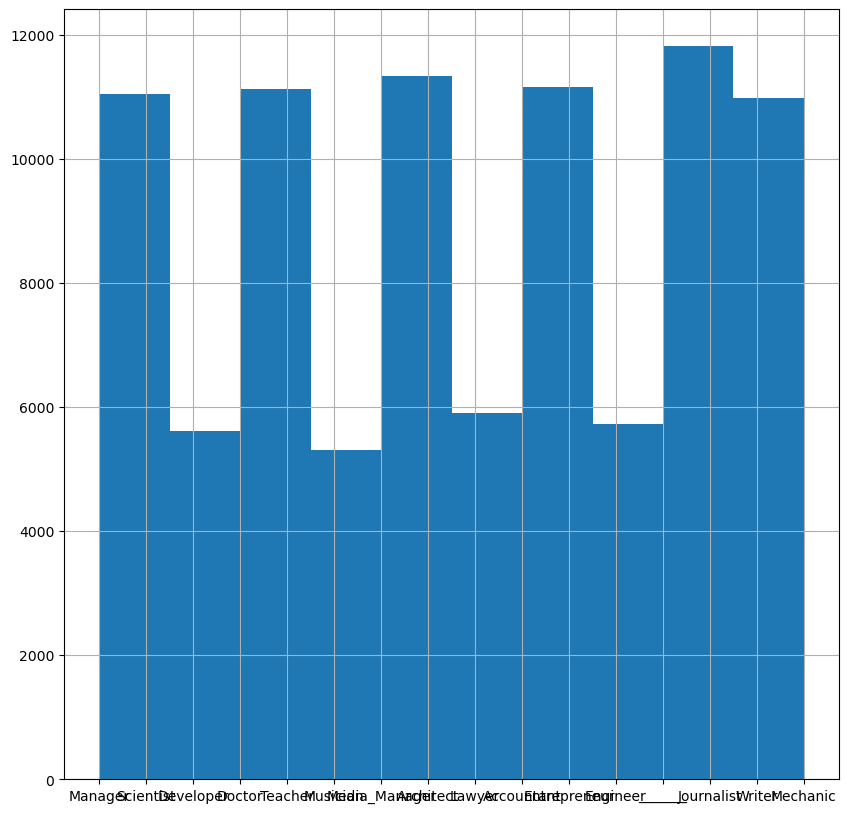

In [19]:
train_data["Occupation"].hist(figsize=(10,10));

### Explore the Annual_Income column

In [20]:
train_data["Annual_Income"].max()

'99995.22'

In [21]:
train_data["Annual_Income"].dtype

dtype('O')

#### Making modifications to the copy of train data to explore the Annul_Income column

In [22]:
cp.head()

ID Customer_ID     Month         Name   Age          SSN Occupation  \
0  0x1d1af  CUS_0x3539  February  an Arakalid  30.0  995-31-4669    Manager   
1  0x1ebd6  CUS_0x8716   January     Matthewz  18.0  185-99-8068  Scientist   
2   0x8a66  CUS_0x21dc   January   Tom Miless  41.0  241-53-8475  Developer   
3  0x1d769  CUS_0x32d3     April        Lisaa  35.0  204-78-6176    Manager   
4  0x236dd  CUS_0xadad    August       Masond  27.0  027-11-6852     Doctor   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      43391.96            3688.996667                  1  ...        Good   
1      14351.21                    NaN                  8  ...         Bad   
2     130125.04           10871.753333                  5  ...        Good   
3      20107.21            1631.600833                  6  ...    Standard   
4      92186.19            7487.182500                  1  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio      Credit_History_Age  \
0           1468.28                29.112468   23 Years and 8 Months   
1           4766.87                39.849732                     NaN   
2           1195.05                21.542892  15 Years and 11 Months   
3            2544.6                32.423759   19 Years and 4 Months   
4            809.01                39.543131   20 Years and 9 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No            0.000000      53.969385063055675   
1                    Yes           61.098718      118.08021357217683   
2                     No          204.285650      1255.8993022448951   
3                    Yes           27.106395       66.81977464950728   
4                     No          185.797654      115.52003931707223   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Large_value_payments   554.9302816036111         Good  
1    Low_spent_Small_value_payments   238.3144849566528         Poor  
2    Low_spent_Small_value_payments                 NaN         Good  
3    Low_spent_Small_value_payments  359.23391378882377         Poor  
4  High_spent_Medium_value_payments   697.4005568630175         Good  

[5 rows x 28 columns]

In [23]:
# Remove _ at the end of numbers in Annual_Income
for i in cp["Annual_Income"]:
    if "_" in i:
        cp["Annual_Income"].replace(i, i[:-1], inplace=True)

In [24]:
cp[cp["Annual_Income"].astype(float) < 0]

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

[0 rows x 28 columns]

### Exploring the Monthly_Inhand_Salary column

In [25]:
train_data["Monthly_Inhand_Salary"].dtype

dtype('float64')

In [26]:
train_data["Monthly_Inhand_Salary"].min(), train_data["Monthly_Inhand_Salary"].max()

(303.6454166666666, 15204.633333333331)

In [27]:
train_data["Monthly_Inhand_Salary"].mean(), train_data["Monthly_Inhand_Salary"].median()

(4193.129009890097, 3088.475)

In [28]:
train_data["Monthly_Inhand_Salary"].isnull().sum()

13488

In [29]:
train_data["Monthly_Inhand_Salary"].sort_values(ascending=False)

56116    15204.633333
51402    15204.633333
26183    15204.633333
72006    15204.633333
37393    15204.633333
             ...     
89932             NaN
89963             NaN
89977             NaN
89987             NaN
89996             NaN
Name: Monthly_Inhand_Salary, Length: 90000, dtype: float64

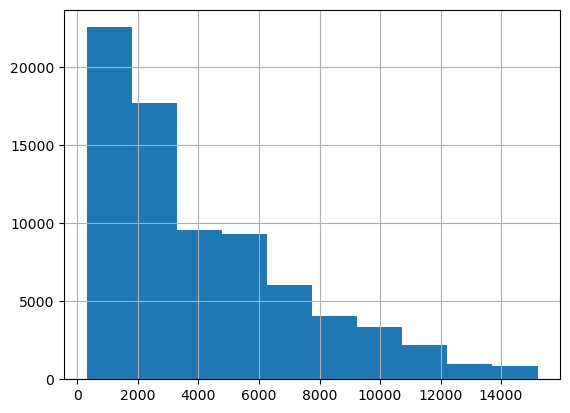

In [30]:
train_data["Monthly_Inhand_Salary"].hist();

### Exploring the Num_Bank_Accounts column

In [31]:
train_data["Num_Bank_Accounts"].dtype

dtype('int64')

In [32]:
train_data["Num_Bank_Accounts"].min(), train_data["Num_Bank_Accounts"].max()

(-1, 1798)

In [33]:
train_data[train_data["Num_Bank_Accounts"] < 0]["Num_Bank_Accounts"].count()

21

In [34]:
train_data[train_data["Num_Bank_Accounts"] > 30]["Num_Bank_Accounts"].count()

1142

### Exploring the Num_Credit_Card column

In [35]:
train_data["Num_Credit_Card"].dtype

dtype('int64')

In [36]:
train_data["Num_Credit_Card"].min(), train_data["Num_Credit_Card"].max()

(0, 1499)

In [37]:
train_data["Num_Credit_Card"].isnull().sum()

0

In [38]:
train_data[train_data["Num_Credit_Card"] > 40]["Num_Credit_Card"].count()

2009

### Exploring the Interest_Rate column

In [39]:
train_data["Interest_Rate"].dtype

dtype('int64')

In [40]:
train_data["Interest_Rate"].isnull().sum()

0

In [41]:
train_data["Interest_Rate"].min(), train_data["Interest_Rate"].max()

(1, 5797)

In [42]:
train_data["Interest_Rate"].sort_values()

85597       1
69959       1
38109       1
19604       1
38132       1
         ... 
38302    5775
20454    5776
32913    5788
53723    5789
82978    5797
Name: Interest_Rate, Length: 90000, dtype: int64

### Exploring the Num_of_Loan column

In [43]:
train_data["Num_of_Loan"].dtype

dtype('O')

In [44]:
train_data["Num_of_Loan"].sort_values()

11284    -100
71891    -100
71893    -100
8672     -100
3741     -100
         ... 
1391       9_
38992      9_
81407      9_
49411      9_
9653       9_
Name: Num_of_Loan, Length: 90000, dtype: object

In [91]:
train_data["Num_of_Loan"].min(), train_data["Num_of_Loan"].max()

('-100', '9_')

#### Create a copy of train_data to explore the Num_of_Loan Column without changing the train data

In [92]:
cp = train_data.copy()

In [93]:
for i in cp["Num_of_Loan"]:
    if "_" in i:
        cp["Num_of_Loan"].replace(i, i[:-1], inplace=True)

In [94]:
cp["Num_of_Loan"].min(), cp["Num_of_Loan"].max()

('-100', '999')

In [95]:
cp[cp["Num_of_Loan"].astype(float) < 0]["Num_of_Loan"].count()

3472

In [96]:
cp[cp["Num_of_Loan"].astype(float) < 0]["Num_of_Loan"].count()

3472

### Exploring the Type_of_Loan column

In [51]:
train_data["Type_of_Loan"].dtype

dtype('O')

In [52]:
train_data["Type_of_Loan"][:10]

0                                                  NaN
1    Mortgage Loan, Personal Loan, Not Specified, S...
2           Mortgage Loan, and Debt Consolidation Loan
3            Credit-Builder Loan, and Home Equity Loan
4    Personal Loan, Auto Loan, Not Specified, and P...
5        Student Loan, Home Equity Loan, and Auto Loan
6                      Student Loan, and Not Specified
7                                                  NaN
8                                        Not Specified
9    Home Equity Loan, Home Equity Loan, Mortgage L...
Name: Type_of_Loan, dtype: object

In [53]:
len(train_data["Type_of_Loan"].unique())

6261

In [54]:
train_data["Type_of_Loan"].isnull().sum()

10328

In [55]:
row_lens = [len(i.split()) for i in train_data["Type_of_Loan"].dropna()]
avg_row_len = np.mean(row_lens)
avg_row_len

9.72464604880008

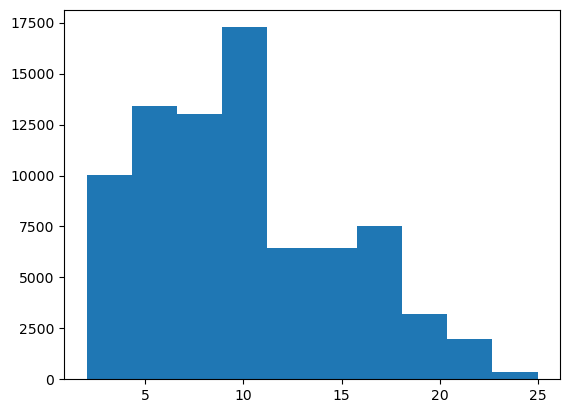

In [56]:
plt.hist(row_lens);

In [57]:
for i in train_data["Type_of_Loan"][:10]:
    print(i)

nan
Mortgage Loan, Personal Loan, Not Specified, Student Loan, Personal Loan, and Student Loan
Mortgage Loan, and Debt Consolidation Loan
Credit-Builder Loan, and Home Equity Loan
Personal Loan, Auto Loan, Not Specified, and Personal Loan
Student Loan, Home Equity Loan, and Auto Loan
Student Loan, and Not Specified
nan
Not Specified
Home Equity Loan, Home Equity Loan, Mortgage Loan, Payday Loan, and Mortgage Loan


In [58]:
# Does null mean 0 loans?
train_data[train_data["Type_of_Loan"].isnull()]["Num_of_Loan"].unique()

array(['0', '0_', '-100', '1416', '103', '1451', '507', '911', '172',
       '33', '1369', '1074', '652', '831', '859', '153', '940', '1227',
       '1447', '1129', '439', '1070', '654', '1478', '378_', '621',
       '1347_', '501', '336', '437', '350', '372', '193', '546', '1430',
       '999', '1296', '394', '215', '143', '1384', '1382', '275', '288',
       '18', '1419', '773', '252', '1035', '330', '126', '881', '897',
       '415', '83', '238', '801', '538', '1027_'], dtype=object)

## Idea on how to preprocess this column:
    * Split the individuals words (mortage, personal, student, etc) 
    * Create new columns that accept only 0 and 1 (do they have a mortage loan - 1, student - 0, etc, etc)

In [105]:
# Create a copy of the Type_of_Loan column (remove nulls first)
x = train_data["Type_of_Loan"].replace(np.nan, "Not Specified")
x

0                                            Not Specified
1        Mortgage Loan, Personal Loan, Not Specified, S...
2               Mortgage Loan, and Debt Consolidation Loan
3                Credit-Builder Loan, and Home Equity Loan
4        Personal Loan, Auto Loan, Not Specified, and P...
                               ...                        
89995    Home Equity Loan, Student Loan, Payday Loan, S...
89996    Auto Loan, Credit-Builder Loan, Personal Loan,...
89997                                        Not Specified
89998       Auto Loan, Not Specified, and Home Equity Loan
89999    Debt Consolidation Loan, Student Loan, Not Spe...
Name: Type_of_Loan, Length: 90000, dtype: object

In [149]:
unique_words = []

for i in x:
    for j in i.split(","):
        unique_words.append(j.strip())
        
        
unique_words = list(set(unique_words))
for idx, i in enumerate(unique_words):
    if "and" in i:
        unique_words[idx] = i[4:]
        
        
unique_words = list(set(unique_words))
unique_words

['Auto Loan',
 'Student Loan',
 'Mortgage Loan',
 'Payday Loan',
 'Home Equity Loan',
 'Debt Consolidation Loan',
 'Credit-Builder Loan',
 'Personal Loan',
 'Not Specified']

In [155]:
cp["Auto_Loan"]

ID Customer_ID     Month            Name   Age          SSN  \
0      0x1d1af  CUS_0x3539  February     an Arakalid    30  995-31-4669   
1      0x1ebd6  CUS_0x8716   January        Matthewz    18  185-99-8068   
2       0x8a66  CUS_0x21dc   January      Tom Miless    41  241-53-8475   
3      0x1d769  CUS_0x32d3     April           Lisaa    35  204-78-6176   
4      0x236dd  CUS_0xadad    August          Masond    27  027-11-6852   
...        ...         ...       ...             ...   ...          ...   
89995  0x13d61  CUS_0x8b0c     April  Ronald Groverk    18  587-03-6623   
89996   0x1604   CUS_0xd40     March   Aaron Maashoh  -500  821-00-0265   
89997   0x7449  CUS_0x6184     April          Sarahc    41  245-92-1411   
89998  0x1a629  CUS_0xb858    August          Gerryy    50  154-48-6016   
89999  0x1c61c  CUS_0xb634     March     Donny Kwoka    41  399-60-8339   

         Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0           Manager      43391.96            3688.996667                  1   
1         Scientist      14351.21                    NaN                  8   
2         Developer     130125.04           10871.753333                  5   
3           Manager      20107.21            1631.600833                  6   
4            Doctor      92186.19            7487.182500                  1   
...             ...           ...                    ...                ...   
89995        Lawyer      9635.555            1034.962917                 10   
89996     Scientist      19114.12                    NaN                  3   
89997        Doctor      30416.28            2346.690000                  5   
89998     Developer      34981.59            2463.387723                  6   
89999  Entrepreneur      67500.54            5642.045000                  7   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0      ...        Good           1468.28                29.112468   
1      ...         Bad           4766.87                39.849732   
2      ...        Good           1195.05                21.542892   
3      ...    Standard            2544.6                32.423759   
4      ...        Good            809.01                39.543131   
...    ...         ...               ...                      ...   
89995  ...         Bad           4795.81                31.854853   
89996  ...        Good            809.98                28.609352   
89997  ...        Good           1021.07                37.749650   
89998  ...           _            349.84                28.976225   
89999  ...    Standard           1080.51                35.706579   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       23 Years and 8 Months                     No            0.000000   
1                         NaN                    Yes           61.098718   
2      15 Years and 11 Months                     No          204.285650   
3       19 Years and 4 Months                    Yes           27.106395   
4       20 Years and 9 Months                     No          185.797654   
...                       ...                    ...                 ...   
89995    1 Years and 7 Months                    Yes           55.980058   
89996   22 Years and 3 Months                     No           49.574949   
89997   18 Years and 7 Months                     No            0.000000   
89998   19 Years and 9 Months                     No          291.550011   
89999                     NaN                    Yes          273.952372   

      Amount_invested_monthly                 Payment_Behaviour  \
0          53.969385063055675   High_spent_Large_value_payments   
1          118.08021357217683    Low_spent_Small_value_payments   
2          1255.8993022448951    Low_spent_Small_value_payments   
3           66.81977464950728    Low_spent_Small_value_payments   
4          115.52003931707223  High_spent_Medium_value_payments   
...               

In [98]:
def preprocess_data(df):
    # Remove unnecessary columns
    df = df.drop(columns=["ID", "Customer_ID", "Name", "SSN"])
    
    # Remove _ at the end of number in Age
    for i in df["Age"]:
        if "_" in i:
            df["Age"].replace(i, i[:-1], inplace=True)

    # Cast Age to float
    df["Age"] = df["Age"].astype(float)
            
    # Remove unreal ages
    df = df[~(df["Age"] < 0)]
    df = df[~(df["Age"] > 120)]

    # Remove weird thing in Occupation
    df = df[df["Occupation"] != "_______"]
    
    # Remove _ at the end of numbers in Annual_Income
    for i in df["Annual_Income"]:
        if "_" in i:
            df["Annual_Income"].replace(i, i[:-1], inplace=True)
        
    # Cast Annual_Income as float
    df["Annual_Income"] = df["Annual_Income"].astype(float)
    
    # Replace unreal data with a set maximum
    for i in df["Num_Bank_Accounts"]:
        if i > 40:
            df["Num_Bank_Accounts"].replace(i, 40, inplace=True)
    
    # Replace -1 banking accounts with 0
    df["Num_Bank_Accounts"].replace(-1, 0, inplace=True)
    
    # Replace unreal data with a set maximum  
    for i in df["Num_Credit_Card"]:
        if i > 40:
            df["Num_Credit_Card"].replace(i, 40, inplace=True)
    
    # Remove _ at the end of numbers in Num_of_Loan
    for i in df["Num_of_Loan"]:
        if "_" in i:
            df["Num_of_Loan"].replace(i, i[:-1], inplace=True)
    
    # Cast the type of Num_of_Loan to float 
    df["Num_of_Loan"] = df["Num_of_Loan"].astype(float)
    
    # Replace negative values with nulls to then substitute with average values
    for i in df["Num_of_Loan"]:
         if i < 0:
            df["Num_of_Loan"].replace(i, np.nan, inplace=True)
            
    # Replace nulls to unspecified Type_of_Loan
    df["Type_of_Loan"] = df["Type_of_Loan"].replace(np.nan, "Not Specified")
            
    ## nulls: Monthly_Inhand_Salary

    
    return df

In [79]:
train_data["Monthly_Balance"].dropna().sort_values(ascending=False)

30829    __-333333333333333333333333333__
43790    __-333333333333333333333333333__
12687    __-333333333333333333333333333__
87082    __-333333333333333333333333333__
12232    __-333333333333333333333333333__
                       ...               
27338                   0.366147079459779
68060                 0.13113565109563294
67988                 0.09548249601976977
84002                 0.08862786534905354
59851                0.007759664775335295
Name: Monthly_Balance, Length: 88916, dtype: object

In [80]:
train_data[train_data["Monthly_Balance"] != "__-333333333333333333333333333__"]["Monthly_Balance"].dropna().astype(float).mean()




402.7025155502235

In [99]:
test = train_data.copy()

In [100]:
test = preprocess_data(test)
test

Month   Age    Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      February  30.0       Manager      43391.960            3688.996667   
1       January  18.0     Scientist      14351.210                    NaN   
2       January  41.0     Developer     130125.040           10871.753333   
3         April  35.0       Manager      20107.210            1631.600833   
4        August  27.0        Doctor      92186.190            7487.182500   
...         ...   ...           ...            ...                    ...   
89994      July  31.0        Lawyer     119113.710            9694.142500   
89995     April  18.0        Lawyer       9635.555            1034.962917   
89997     April  41.0        Doctor      30416.280            2346.690000   
89998    August  50.0     Developer      34981.590            2463.387723   
89999     March  41.0  Entrepreneur      67500.540            5642.045000   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                      1                5             10          0.0   
1                      8                7             18          6.0   
2                      5                2             11          2.0   
3                      6                6             32          2.0   
4                      1                2             12          4.0   
...                  ...              ...            ...          ...   
89994                  4                7              4          2.0   
89995                 10                8             23          7.0   
89997                  5                4              4          0.0   
89998                  6                6             15          3.0   
89999                  7                5           5707          5.0   

                                            Type_of_Loan  ...  Credit_Mix  \
0                                          Not Specified  ...        Good   
1      Mortgage Loan, Personal Loan, Not Specified, S...  ...         Bad   
2             Mortgage Loan, and Debt Consolidation Loan  ...        Good   
3              Credit-Builder Loan, and Home Equity Loan  ...    Standard   
4      Personal Loan, Auto Loan, Not Specified, and P...  ...        Good   
...                                                  ...  ...         ...   
89994                       Auto Loan, and Personal Loan  ...        Good   
89995  Home Equity Loan, Student Loan, Payday Loan, S...  ...         Bad   
89997                                      Not Specified  ...        Good   
89998     Auto Loan, Not Specified, and Home Equity Loan  ...           _   
89999  Debt Consolidation Loan, Student Loan, Not Spe...  ...    Standard   

      Outstanding_Debt Credit_Utilization_Ratio      Credit_History_Age  \
0              1468.28                29.112468   23 Years and 8 Months   
1              4766.87                39.849732                     NaN   
2              1195.05                21.542892  15 Years and 11 Months   
3               2544.6                32.423759   19 Years and 4 Months   
4               809.01                39.543131   20 Years and 9 Months   
...                ...                      ...                     ...   
89994           645.24                27.901622   25 Years and 9 Months   
89995          4795.81                31.854853    1 Years and 7 Months   
89997          1021.07                37.749650   18 Years and 7 Months   
89998           349.84                28.976225   19 Years and 9 Months   
89999          1080.51                35.706579                     NaN   

      Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
0                        No            0.000000       53.969385063055675   
1                       Yes           61.098718       118.08021357217683   
2                        No          204.285650       1255.8993022448951   
3                       Yes           27.106395        66.81977464950728   
4 

In [101]:
test.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       12176
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  3124
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment       5705
Changed_Credit_Limit            0
Num_Credit_Inquiries         1626
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           7362
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3588
Payment_Behaviour               0
Monthly_Balance               998
Credit_Score                    0
dtype: int64